In [3]:
library(Seurat)
library(ggplot2)
library(ggsci)
library(ggthemr)
library(readxl)
library(FNN)
library(ape)
library(stats)
library(aricode)
library(topGO)
library(spdep)
library(ggpubr)

In [ ]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# sample_name=c(151507,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676)
# samples=sample_name
# flags1=samples[1]
# for(i in 2:length(samples)){flags1=paste(flags1,'-',samples[i],sep="")}
    
# feat=read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[1],"_features.txt",sep=""),header=T,row.names=1)
# meta=read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[1],"_label.txt",sep=""),header=T,row.names=1)
# coord=read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[1],"_positions.txt",sep=""),header=T,row.names=1)
# flags=paste('_',samples[1],sep="")
# for(i in 2:length(samples)){
#     feat=rbind(feat,read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[i],"_features.txt",sep=""),header=T,row.names=1))
#     meta=rbind(meta,read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[i],"_label.txt",sep=""),header=T,row.names=1))
#     coord=rbind(coord,read.csv(paste(dirs,"gtt_input_scanpy/",flags1,'_',samples[i],"_positions.txt",sep=""),header=T,row.names=1))
#     flags=paste(flags,'_',samples[i],sep="")
# }
# celltype=meta[,1]
# batch=meta[,2]
# ub=unique(batch)

# coord_new=read.csv(paste(dirs,"gtt_output/coordinate_file/gtt_new_coordinate",flags,"_mclust.csv",sep=""),header=T,row.names=1)
# embed=read.csv(paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep=""),header=T,row.names=1)
# xbar_new=read.csv(paste(dirs,"gtt_output/AGC_exp_corrected0",flags,"_xent.csv",sep=""),header=T,row.names=1)
# umap_mat=read.csv(paste(dirs,"umap/GraphSCIDRL",flags,"_umap.csv",sep=""),header=T,row.names=1)
# leiden_clust=read.csv(paste(dirs,'metrics/leiden_clust',flags,'.csv',sep=""),header=T,row.names=1)
# mclust_clust=read.csv(paste(dirs,'metrics/mclust_clust',flags,'.csv',sep=""),header=T,row.names=1)
# louvain_clust=read.csv(paste(dirs,'metrics/louvain_clust',flags,'.csv',sep=""),header=T,row.names=1)
# if(dim(embed)[2]==16){
#     znoise_dim=3
# }else{
#     znoise_dim=5
# }
# idx=list()
# for(i in 1:length(ub)){
#     idx[[i]]=which(batch==ub[i])
# }
# seurat_mat=read.csv(paste(dirs,"methods/seurat_expression",flags,".txt",sep=""),header=T,row.names=1)    

In [21]:
dirs="/data02/tguo/space_batch_effect/mouse_brain/"
sample_name=c("all_posterior1","all_posterior2","all_anterior1","all_anterior2")
samples=sample_name
feat=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1)
meta=read.csv(paste(dirs,"gtt_input/",samples[1],"_meta.csv",sep=""),header=T,row.names=1)
coord=read.csv(paste(dirs,"gtt_input/",samples[1],"_coord.csv",sep=""),header=T,row.names=1)
flags=paste('_',samples[1],sep="")
for(i in 2:length(samples)){
    feat=rbind(feat,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1))
    meta=rbind(meta,read.csv(paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""),header=T,row.names=1))
    coord=rbind(coord,read.csv(paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""),header=T,row.names=1))
    flags=paste(flags,'_',samples[i],sep="")
}
celltype=meta[,1]
batch=meta[,2]
ub=unique(batch)

embed=read.csv(paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep=""),header=T,row.names=1)
xbar_new=read.csv(paste(dirs,"gtt_output/AGC_exp_corrected0",flags,"_xent.csv",sep=""),header=T,row.names=1)
leiden_clust=read.csv(paste(dirs,'metrics/leiden_clust',flags,'.csv',sep=""),header=T,row.names=1)
mclust_clust=read.csv(paste(dirs,'metrics/mclust_clust',flags,'.csv',sep=""),header=T,row.names=1)
louvain_clust=read.csv(paste(dirs,'metrics/louvain_clust',flags,'.csv',sep=""),header=T,row.names=1)
mclust_clust_cortex=read.csv(paste(dirs,'metrics/mclust_clust',flags,'_cortex.csv',sep=""),header=T,row.names=1)
if(dim(embed)[2]==16){
    znoise_dim=3
}else{
    znoise_dim=5
}
idx=list()
for(i in 1:length(ub)){
    idx[[i]]=which(batch==ub[i])
}
seurat_mat=read.csv(paste(dirs,"methods/seurat_expression",flags,".txt",sep=""),header=T,row.names=1)
gtt_clust=louvain_clust
uc=unique(louvain_clust[,1])

In [2]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# sample_name=c("10X_Normal","10X_DAPI","10X_FFPE")
# samples=sample_name
# feat=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1)
# meta=read.csv(paste(dirs,"gtt_input/",samples[1],"_meta.csv",sep=""),header=T,row.names=1)
# coord=read.csv(paste(dirs,"gtt_input/",samples[1],"_coord.csv",sep=""),header=T,row.names=1)
# flags=paste('_',samples[1],sep="")
# for(i in 2:length(samples)){
#     feat=rbind(feat,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1))
#     meta=rbind(meta,read.csv(paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""),header=T,row.names=1))
#     coord=rbind(coord,read.csv(paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""),header=T,row.names=1))
#     flags=paste(flags,'_',samples[i],sep="")
# }
# celltype=meta[,1]
# batch=meta[,2]
# ub=unique(batch)

# coord_new=read.csv(paste(dirs,"gtt_output/coordinate_file/gtt_new_coordinate",flags,"_louvain.csv",sep=""),header=T,row.names=1)
# embed=read.csv(paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep=""),header=T,row.names=1)
# xbar_new=read.csv(paste(dirs,"gtt_output/AGC_exp_corrected0",flags,"_xent.csv",sep=""),header=T,row.names=1)
# umap_mat=read.csv(paste(dirs,"umap/GraphSCIDRL",flags,"_umap.csv",sep=""),header=T,row.names=1)
# leiden_clust=read.csv(paste(dirs,'metrics/leiden_clust',flags,'.csv',sep=""),header=T,row.names=1)
# mclust_clust=read.csv(paste(dirs,'metrics/mclust_clust',flags,'.csv',sep=""),header=T,row.names=1)
# louvain_clust=read.csv(paste(dirs,'metrics/louvain_clust',flags,'.csv',sep=""),header=T,row.names=1)
# gtt_clust=louvain_clust
# if(dim(embed)[2]==16){
#     znoise_dim=3
# }else{
#     znoise_dim=5
# }
# idx=list()
# for(i in 1:length(ub)){
#     idx[[i]]=which(batch==ub[i])
# }
# seurat_mat=read.csv(paste(dirs,"methods/seurat_expression",flags,".txt",sep=""),header=T,row.names=1)
# uc=c('Astrocyte','CA1/2','CA3','DG','Excitatory_neuron','Hippocampus','Inhibitory_neuron','L2/3','L4','L5/6','L6b','Oligodendrocyte')

In [49]:
# dirs="/data02/tguo/space_batch_effect/mouse_OB/"
# sample_name=c("BGI","SlideV2","10X")
# # sample_name=c("BGI","SlideV2")
# samples=sample_name
# feat=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1)
# meta=read.csv(paste(dirs,"gtt_input/",samples[1],"_meta.csv",sep=""),header=T,row.names=1)
# coord=read.csv(paste(dirs,"gtt_input/",samples[1],"_coord.csv",sep=""),header=T,row.names=1)
# flags=paste('_',samples[1],sep="")
# for(i in 2:length(samples)){
#     feat=rbind(feat,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1))
#     meta=rbind(meta,read.csv(paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""),header=T,row.names=1))
#     coord=rbind(coord,read.csv(paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""),header=T,row.names=1))
#     flags=paste(flags,'_',samples[i],sep="")
# }
# celltype=meta[,1]
# batch=meta[,2]
# ub=unique(batch)
# meta$celltype[meta$celltype=='SEZ']='GCL'
# meta$celltype[meta$celltype=='Meninges']='ONL'
# meta$celltype[meta$celltype=='OPL']='EPL'
# meta$celltype[meta$celltype=='GCL_1']='GCL'
# meta$celltype[meta$celltype=='GCL_2']='GCL'
# meta$celltype[meta$celltype=='GL_1']='GL'
# meta$celltype[meta$celltype=='GL_2']='GL'

# coord_new=read.csv(paste(dirs,"gtt_output/coordinate_file/gtt_new_coordinate",flags,"_louvain.csv",sep=""),header=T,row.names=1)
# embed=read.csv(paste(dirs,"gtt_output/AGC_embed",flags,"_expression_xent.csv",sep=""),header=T,row.names=1)
# xbar_new=read.csv(paste(dirs,"gtt_output/AGC_exp_corrected0",flags,"_expression_xent.csv",sep=""),header=T,row.names=1)
# umap_mat=read.csv(paste(dirs,"umap/GraphSCIDRL",flags,"_umap.csv",sep=""),header=T,row.names=1)
# louvain_clust=read.csv(paste(dirs,'metrics/louvain_clust',flags,'_expression.csv',sep=""),header=T,row.names=1)
# if(dim(embed)[2]==16){
#     znoise_dim=3
# }else{
#     znoise_dim=5
# }
# idx=list()
# for(i in 1:length(ub)){
#     idx[[i]]=which(batch==ub[i])
# }
# seurat_mat=read.csv(paste(dirs,"methods/seurat_expression",flags,".txt",sep=""),header=T,row.names=1)

# uc=c('2','4','0','7','1','5','6','3')
# colors1=data.frame(ggsci:::ggsci_db$"npg")[c(1,5,3:4,2,6:10),1]
# colors2=data.frame(ggsci:::ggsci_db$"nejm")[c(3,5),1]
# colors=c(colors1,colors2)
# gtt_clust=louvain_clust

In [22]:
generate_obj<-function(X,coord,meta,embed,clust){
    X<-as(t(X),'dgCMatrix')
    dl<-CreateSeuratObject(counts=X,min.cells=0, min.features=0,meta.data=meta)
    VariableFeatures(dl)<-rownames(dl)
    dl@assays$RNA@scale.data=as.matrix(X)
    dl@images$image <- new(Class = 'SlideSeq',assay = "Spatial",key = "image_",coordinates=coord[colnames(X),])
#     dl[['umap']]<-CreateDimReducObject(embeddings=as.matrix(umap_mat[colnames(X),]), key = "umap_", assay=DefaultAssay(dl))
    dl[['gtt']]<-CreateDimReducObject(embeddings=as.matrix(embed[colnames(X),znoise_dim:dim(embed)[2]]), key = "gtt_", assay=DefaultAssay(dl))
    dl$gtt_clusters=clust[colnames(X),]
    return(dl)
}
names=rownames(gtt_clust)
dl_org=generate_obj(feat[names,],coord[names,],meta[names,],embed[names,],gtt_clust)
dl_re=generate_obj(xbar_new[names,],coord[names,],meta[names,],embed[names,],gtt_clust)
dl_seurat=generate_obj(seurat_mat[names,],coord[names,],meta[names,],embed[names,],gtt_clust)
##############
dl_org$gtt_clusters<-factor(dl_org$gtt_clusters,levels=uc)
dl_re$gtt_clusters<-factor(dl_re$gtt_clusters,levels=uc)
dl_seurat$gtt_clusters<-factor(dl_seurat$gtt_clusters,levels=uc)
# # # ####cortex#####
# cortex=c('L2/3','L4','L5','L5/6','L6b')
# dl_org_cortex=subset(dl_org,subset=celltype%in%cortex)
# dl_re_cortex=subset(dl_re,subset=celltype%in%cortex)
# dl_seurat_cortex=subset(dl_seurat,subset=celltype%in%cortex)
####hippo#####
# hippo=c('Hippocampus','CA1/2','DG','CA3')
# dl_org_hippo=subset(dl_org,subset=celltype%in%hippo)
# dl_re_hippo=subset(dl_re,subset=celltype%in%hippo)
# dl_seurat_hippo=subset(dl_seurat,subset=celltype%in%hippo)

皮层子类分析

In [64]:
Idents(dl_org_cortex)<-dl_org_cortex$gtt_clusters
markers1=FindAllMarkers(dl_org_cortex,logfc.threshold = 0.25,test.use = "wilcox",slot = "data",min.pct = 0.1)
markers1=markers1[markers1$p_val_adj<0.01,]
markers1=markers1[order(-markers1$avg_log2FC,markers1$p_val_adj),]
markers1$cluster=as.character(markers1$cluster)
markers1=markers1[markers1$avg_log2FC>0.1,]

Calculating cluster 6

Calculating cluster 22

Calculating cluster 3

Calculating cluster 19

Calculating cluster 0

Calculating cluster 26

Calculating cluster 21

Calculating cluster 12

Calculating cluster 17

Calculating cluster 16

Warning message:
“The following tests were not performed: ”
Warning message:
“When testing 6 versus all:
	Cell group 1 has fewer than 3 cells”


Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



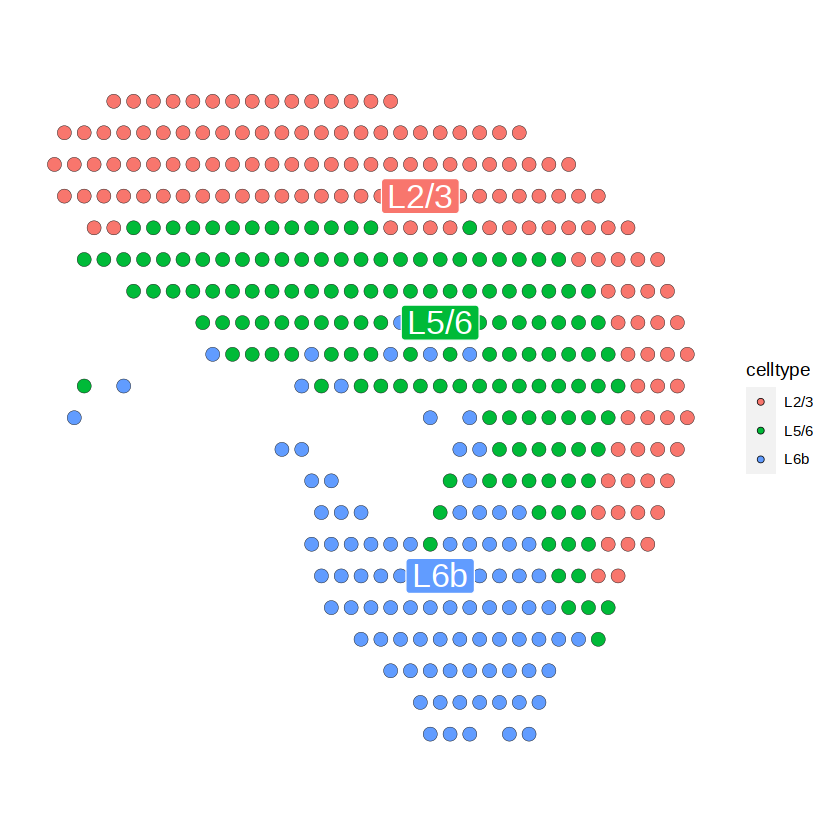

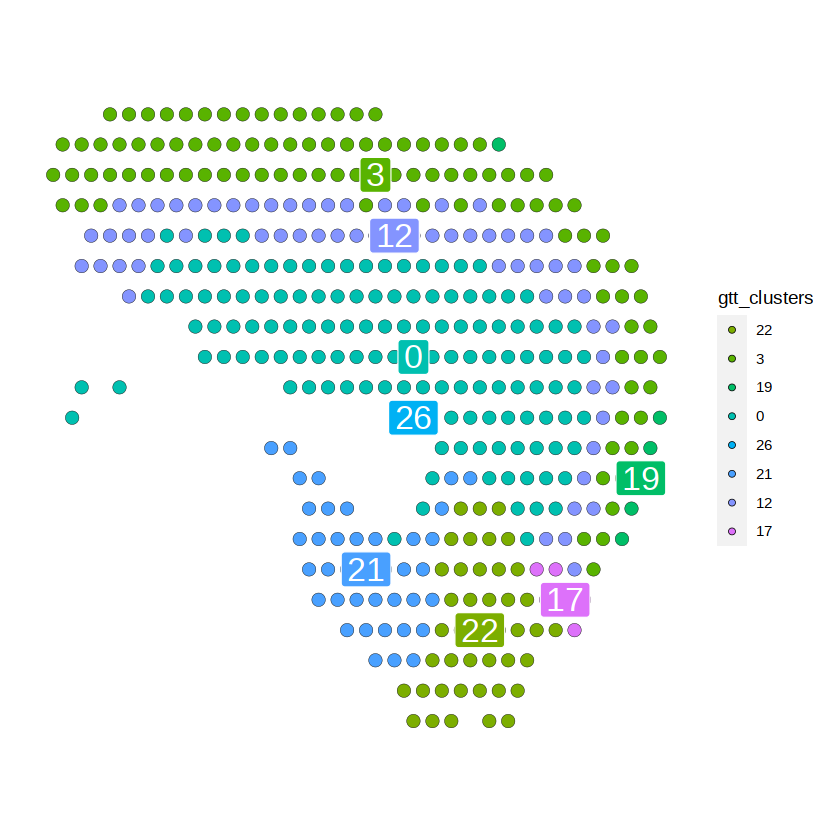

In [29]:
dl_org_cortex1<-subset(dl_org_cortex,subset=batch==ub[1])
dl_org1<-subset(dl_org,subset=batch==ub[1])
SpatialDimPlot(dl_org_cortex1,group.by='celltype',label=T,pt.size=5)
SpatialDimPlot(dl_org_cortex1,group.by='gtt_clusters',label=T,pt.size=5)

In [65]:
cells1=c('Mitral','Tufted')
exp=dl_org@assays$RNA@data[,which(dl_org$celltype%in%cells1)]
data=data.frame(exp=0,cluster=0)
uc_cortex=c('3','12','0','26','16','17')
for(k in uc_cortex){
    a=markers1[markers1$cluster==k,7]
    data=rbind(data,data.frame(exp=as.vector(exp[a,]),cluster=k))
}
data=data[-1,]
data$cluster=as.factor(data$cluster)
data$cortex='cluster_0_3_12_26'
data$cortex[data$cluster%in%c('16','17')]='cluster_16_17'
data$cortex=factor(data$cortex,levels=c('cluster_16_17','cluster_0_3_12_26'))
stat.test<-compare_means(exp ~ cortex, data =data, method = "wilcox.test", paired = FALSE)

In [90]:
png(paste(dirs,'fig/DEG_cortex_AOC_enrichment.png',sep=""),width=1200,height=800,res=500)
p <- ggboxplot(data, x = "cortex", y = "exp",fill = "cortex", add = "none",outlier.shape=NA,lwd=0.1)+
stat_pvalue_manual(stat.test,label = "p.signif",y.position=6,label.size=2)+scale_fill_npg()+
labs(title="Enrichment in Olfactory Bulb of DEG")+xlab('')+ylab('Normalized Expression')+theme_bw()+
theme(axis.text.x=element_text(size=4, face="bold",colour = "black"),
      axis.text.y=element_text(size=4, face="bold",colour = "black"),
      axis.title.x=element_blank(),
      axis.title.y=element_text(face="bold", size=5, colour = "black"),
      plot.title=element_text(face="bold", size=5, colour = "black",hjust=0.5),
      legend.text=element_text(size=4, colour = "black",face="bold"),
      legend.title=element_text(size=4, colour = "black",face="bold"),
      panel.border = element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      axis.line=element_line(size=0.3, colour = "black"),
      axis.ticks=element_line(size=0.3, colour = "black"),
      legend.spacing.y = unit(0.05, 'cm'),
     legend.key.size = unit(0.1, 'cm'), 
     legend.key.height = unit(0.1, 'cm'),
     legend.key.width = unit(0.1, 'cm'),
      legend.box.margin=margin(-8,-8,-8,-8),
      legend.position='None',
      strip.text = element_text(size = 5,face="bold",colour = "black"),
      strip.background=element_blank())
print(p)
dev.off()

png 
  2

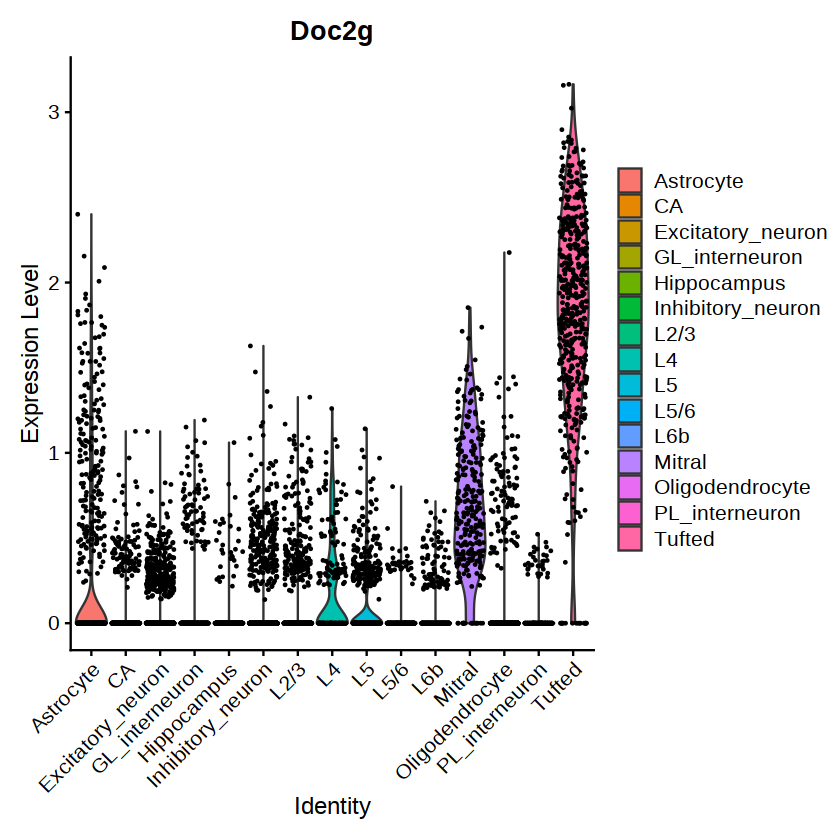

In [397]:
k=3
# SpatialFeaturePlot(dl_org_cortex1,features=a[k],pt.size=5)
# SpatialFeaturePlot(dl_org1,features=a[k],pt.size=5)
VlnPlot(dl_org,features=a[k],group.by='celltype')

基因的空间连续性

In [7]:
####marker gene的空间连续性:Moran.I and gereay'C######
get_moran<-function(pos,exp,batch,marker,knn){
    knnindex=get.knn(pos, k=knn)$nn.index
    weight=matrix(0,nrow=dim(pos)[1],ncol=dim(pos)[1])
    for(i in 1:dim(pos)[1]){
        weight[i,knnindex[i,]]=1
    }
    moran=data.frame(moran=0,geary=0,batch=batch)
    for(marker_id in 1:length(marker)){
        marker_exp=exp@assays$RNA@data[marker[marker_id],]
        a=Moran.I(as.vector(marker_exp), weight, scaled = T)$observed
        b=as.numeric(geary.test(as.vector(marker_exp),mat2listw(weight))$estimate[1])
        moran=rbind(moran,data.frame(moran=a,geary=b,batch=batch))
    }
    moran<-moran[-1,]
    rownames(moran)<-marker
    return(moran)
}

In [10]:
######mouse brain矢量########
knn=6
marker=read_excel(paste(dirs,"marker/marker_genes_0703.xlsx",sep=""),sheet="saggital")
marker=as.data.frame(marker)
marker1<-marker[marker$CELLTYPE%in%c('oligodendrocyte','inhibitory neuron','hippocampus','pan-EX/Excibatory Neuron','pan-EX',
                              'L2/3','L2/3','L4','L5','L5/6','L6b','CA','PL-interneuron','GL-interneuron'),]
marker2<-marker[marker$CELLTYPE%in%c('oligodendrocyte','inhibitory neuron','hippocampus','pan-EX/Excibatory Neuron','pan-EX',
                              'L2/3','L2/3','L4','L5','L5/6','L6b','CA','Astrocyte','Tufted','Mitral'),]
marker1=intersect(rownames(dl_org@assays$RNA@data),marker1[,1])
marker2=intersect(rownames(dl_org@assays$RNA@data),marker2[,1])

########计算moran##########
k=1
marker=marker1
coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
dl_org1=subset(dl_org,subset=batch==ub[k])
moran_org=get_moran(coord1,dl_org1,ub[k],marker,knn)
for(k in 2:length(ub)){
    coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
    dl_org1=subset(dl_org,subset=batch==ub[k])
    if(k>=3){marker=marker2}
    moran_org<-rbind(moran_org,get_moran(coord1,dl_org1,ub[k],marker,knn))
}

k=1
marker=marker1
coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
dl_re1=subset(dl_re,subset=batch==ub[k])
moran_re=get_moran(coord1,dl_re1,ub[k],marker,knn)
for(k in 2:length(ub)){
    coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
    dl_re1=subset(dl_re,subset=batch==ub[k])
    if(k>=3){marker=marker2}
    moran_re<-rbind(moran_re,get_moran(coord1,dl_re1,ub[k],marker,knn))
}

k=1
marker=marker1
coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
moran_seurat=get_moran(coord1,dl_seurat1,ub[k],marker,knn)
for(k in 2:length(ub)){
    coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
    dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
    if(k>=3){marker=marker2}
    moran_seurat<-rbind(moran_seurat,get_moran(coord1,dl_seurat1,ub[k],marker,knn))
}



moran_org$method='Raw'
moran_re$method='GraphSCIDRL'
moran_seurat$method='seurat'
moran=rbind(rbind(moran_org,moran_re),moran_seurat)
write.csv(moran,paste(dirs,'marker/moran_stat_marker.csv',sep=''))
moran$geary=1-moran$geary
moran[moran$batch=='posterior1','gene']=marker1
moran[moran$batch=='posterior2','gene']=marker1
moran[moran$batch=='anterior1','gene']=marker2
moran[moran$batch=='anterior2','gene']=marker2
moran1<-aggregate(moran$moran,list(moran$method,moran$gene),'mean')
colnames(moran1)<-c('method','gene','score')
moran2<-aggregate(moran$geary,list(moran$method,moran$gene),'mean')
colnames(moran2)<-c('method','gene','score')
moran1$stats="Moran's I"
moran2$stats<-"Geary's C"
data<-rbind(moran1,moran2)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”


ERROR: Error in get.knn(pos, k = knn): object 'coord_new' not found


In [12]:
# ######mouse brain冠状面########
# knn=6
# marker=as.data.frame(read_excel(paste(dirs,"markers/marker_genes_0703.xlsx",sep=""),sheet="coronal"))
# marker=intersect(rownames(dl_org@assays$RNA@data),marker[,1])
# ########计算moran##########
# k=1
# coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
# dl_org1=subset(dl_org,subset=batch==ub[k])
# moran_org=get_moran(coord1,dl_org1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
#     dl_org1=subset(dl_org,subset=batch==ub[k])
#     moran_org<-rbind(moran_org,get_moran(coord1,dl_org1,ub[k],marker,knn))
# }

# k=1
# coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
# dl_re1=subset(dl_re,subset=batch==ub[k])
# moran_re=get_moran(coord1,dl_re1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
#     dl_re1=subset(dl_re,subset=batch==ub[k])
#     moran_re<-rbind(moran_re,get_moran(coord1,dl_re1,ub[k],marker,knn))
# }

# k=1
# coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
# dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
# moran_seurat=get_moran(coord1,dl_seurat1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
#     dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
#     moran_seurat<-rbind(moran_seurat,get_moran(coord1,dl_seurat1,ub[k],marker,knn))
# }
# moran_org$method='Raw'
# moran_re$method='GraphSCIDRL'
# moran_seurat$method='seurat'

# knn=6
# moran_new=get_moran(coord_new[colnames(dl_re@assays$RNA@data),c('x','y')],dl_re,'all',marker,knn)
# moran_new$method='GraphSCIDRL_RCP'

# moran=rbind(rbind(rbind(moran_org,moran_re),moran_seurat),moran_new)
# write.csv(moran,paste(dirs,'markers/moran_stat_marker.csv',sep=''))


# moran$geary=1-moran$geary
# moran$gene<-marker
# moran1<-aggregate(moran$moran,list(moran$method,moran$gene),'mean')
# colnames(moran1)<-c('method','gene','score')
# moran2<-aggregate(moran$geary,list(moran$method,moran$gene),'mean')
# colnames(moran2)<-c('method','gene','score')
# moran1$stats="Moran's I"
# moran2$stats<-"Geary's C"
# data<-rbind(moran1,moran2)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”


In [7]:
# #######mouse OB########
# marker=c('Atp2b4','Mbp','Pcp4','Nrgn','Gabra1','Slc6a11','Kctd12')
# # marker=unique(marker_org1[,7])
# knn=8
# k=1
# coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
# dl_org1=subset(dl_org,subset=batch==ub[k])
# moran_org=get_moran(coord1,dl_org1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     if(k==3){knn=6}
#     coord1=dl_org@images$image@coordinates[dl_org$batch==ub[k],]
#     dl_org1=subset(dl_org,subset=batch==ub[k])
#     moran_org<-rbind(moran_org,get_moran(coord1,dl_org1,ub[k],marker,knn))
# }

# # marker=unique(marker_re1[,7])
# knn=8
# k=1
# coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
# dl_re1=subset(dl_re,subset=batch==ub[k])
# moran_re=get_moran(coord1,dl_re1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     if(k==3){knn=6}
#     coord1=dl_re@images$image@coordinates[dl_re$batch==ub[k],]
#     dl_re1=subset(dl_re,subset=batch==ub[k])
#     moran_re<-rbind(moran_re,get_moran(coord1,dl_re1,ub[k],marker,knn))
# }


# # marker=unique(marker_seurat1[,7])
# knn=8
# k=1
# coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
# dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
# moran_seurat=get_moran(coord1,dl_seurat1,ub[k],marker,knn)
# for(k in 2:length(ub)){
#     if(k==3){knn=6}
#     coord1=dl_seurat@images$image@coordinates[dl_seurat$batch==ub[k],]
#     dl_seurat1=subset(dl_seurat,subset=batch==ub[k])
#     moran_seurat<-rbind(moran_seurat,get_moran(coord1,dl_seurat1,ub[k],marker,knn))
# }

# knn=8
# moran_new=get_moran(coord_new[colnames(dl_re@assays$RNA@data),c('x','y')],dl_re,'all',marker,knn)

# moran_new$method='GraphSCIDRL_RCP'
# moran_org$method='Raw'
# moran_re$method='GraphSCIDRL'
# moran_seurat$method='seurat'
# moran=rbind(rbind(rbind(moran_org,moran_re),moran_seurat),moran_new)
# write.csv(moran,paste(dirs,'marker/moran_stat_marker.csv',sep=''))

# moran$geary=1-moran$geary
# moran$gene<-marker
# moran1<-aggregate(moran$moran,list(moran$method,moran$gene),'mean')
# colnames(moran1)<-c('method','gene','score')
# moran2<-aggregate(moran$geary,list(moran$method,moran$gene),'mean')
# colnames(moran2)<-c('method','gene','score')
# moran1$stats="Moran's I"
# moran2$stats<-"Geary's C"
# data<-rbind(moran1,moran2)

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”


In [14]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# sample_name=c("10X_Normal","10X_DAPI","10X_FFPE")
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# sample_name=c("all_posterior1","all_posterior2","all_anterior1","all_anterior2")
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
sample_name=c("BGI","SlideV2")

samples=sample_name
flags=paste('_',samples[1],sep="")
feat=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1)
for(i in 2:length(samples)){
     flags=paste(flags,'_',samples[i],sep="")
    feat=rbind(feat,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1))
}
moran<-read.csv(paste(dirs,'marker/moran_stat_marker.csv',sep=''),header=T,row.names=1)
moran$geary=1-moran$geary


# marker=as.data.frame(read_excel(paste(dirs,"markers/marker_genes_0703.xlsx",sep=""),sheet="coronal"))
# marker=intersect(colnames(feat),marker[,1])
# knn=6

# marker=read_excel(paste(dirs,"marker/marker_genes_0703.xlsx",sep=""),sheet="saggital")
# marker=as.data.frame(marker)
# marker1<-marker[marker$CELLTYPE%in%c('oligodendrocyte','inhibitory neuron','hippocampus','pan-EX/Excibatory Neuron','pan-EX',
#                               'L2/3','L2/3','L4','L5','L5/6','L6b','CA','PL-interneuron','GL-interneuron'),]
# marker2<-marker[marker$CELLTYPE%in%c('oligodendrocyte','inhibitory neuron','hippocampus','pan-EX/Excibatory Neuron','pan-EX',
#                               'L2/3','L2/3','L4','L5','L5/6','L6b','CA','Astrocyte','Tufted','Mitral'),]
# marker1=intersect(colnames(feat),marker1[,1])
# marker2=intersect(colnames(feat),marker2[,1])
# marker=c(rep(marker1,times=3),rep(marker1,times=3),rep(marker2,times=3),rep(marker2,times=3))

marker=c('Atp2b4','Mbp','Pcp4','Nrgn','Gabra1','Slc6a11','Kctd12')

moran$gene<-marker
moran1<-aggregate(moran$moran,list(moran$method,moran$gene),'mean')
colnames(moran1)<-c('method','gene','score')
moran2<-aggregate(moran$geary,list(moran$method,moran$gene),'mean')
colnames(moran2)<-c('method','gene','score')
moran1$stats="Moran's I"
moran2$stats<-"Geary's C"
data<-rbind(moran1,moran2)
data$method[data$method=='GraphSCIDRL']='SPIRAL'
data$method[data$method=='GraphSCIDRL_RCP']='SPIRAL_AC'

In [15]:
# color_used=data.frame(ggsci:::ggsci_db$"npg")[c(6,7),1]
color_used=data.frame(ggsci:::ggsci_db$"npg")[,1]
png(paste(dirs,'fig/marker_moran_geary_stat.png',sep=""),width=900,height=800,res=500)
p<-ggplot(data,aes(x=stats,y=score,fill=method))+geom_boxplot(outlier.shape=16,outlier.size=0.01,lwd=0.1)+
# scale_fill_npg()+
scale_fill_manual(values=color_used)+
labs(title="Sptail autocorrelation")+xlab('')+ylab("")+theme_bw()+
theme(axis.text.x=element_text(size=4.5, face="bold",colour = "black",angle=0),
      axis.text.y=element_text(size=4.5, face="bold",colour = "black"),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      plot.title=element_text(face="bold", size=5.5, colour = "black",hjust=0.5),
      legend.text=element_text(size=4.5, colour = "black",face="bold"),
#       legend.title=element_text(size=4, colour = "black",face="bold"),
      legend.title=element_blank(),
      panel.border = element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      axis.line=element_line(size=0.3, colour = "black"),
      axis.ticks=element_line(size=0.3, colour = "black"),
     legend.position="top",
     legend.spacing.y = unit(0.05, 'cm'),
      legend.spacing.x = unit(0.05, 'cm'),
     legend.key.size = unit(0.1, 'cm'), 
     legend.key.height = unit(0.1, 'cm'),
     legend.key.width = unit(0.1, 'cm'),
      legend.box.margin=margin(-8,-8,-8,-8),
      strip.text = element_text(size = 5,face="bold",colour = "black"),
      strip.background=element_blank())
print(p)
dev.off()


png 
  2

差异基因

In [170]:
# ######找空间相关的差异基因#######
# svf_org<-FindSpatiallyVariableFeatures(dl_org, assay ='RNA',selection.method = "markvariogram")
#####找差异基因######
# Idents(dl_org)<-dl_org$celltype
# marker_org<-FindAllMarkers(dl_org,only.pos = TRUE,logfc.threshold = 0.0,min.pct = 0.1,test.use = 'wilcox',
#                            min.cells.feature=0,min.cells.group=0)
marker_org_batch=data.frame(marker=0,cluster=0)
for(i in 1:length(ub)){
    dl_org1<-subset(dl_org,subset=batch==ub[i])
    a<-FindAllMarkers(dl_org1,only.pos = TRUE,logfc.threshold = 0.0,min.pct = 0.1,test.use = 'wilcox',
                           min.cells.feature=0,min.cells.group=0)
    a=a[a$p_val_adj<0.01,]
    a=a[a$avg_log2FC>0.5,]
    for(j in 1:length(uc)){
        x=a[a$cluster==uc[j],7]
        if(length(x)>0){
            if(dim(marker_org_batch)[1]>2){
                y=marker_org_batch[marker_org_batch$cluster==uc[j],'marker']
                x=union(x,y)
            }
            marker_org_batch=rbind(marker_org_batch,data.frame(marker=x,cluster=uc[j]))
        }
    }
}
marker_org_batch<-marker_org_batch[-1,]
marker_org_batch<-marker_org_batch[!duplicated(marker_org_batch),]
write.csv(marker_org_batch,paste(dirs,"marker/marker_origin_discrete",flags,".csv",sep=""))

Idents(dl_re)<-dl_re$celltype
marker_re<-FindAllMarkers(dl_re,only.pos = TRUE,logfc.threshold = 0.0,min.pct = 0.1,test.use = 'wilcox',
                           min.cells.feature=0,min.cells.group=0)
Idents(dl_seurat)<-dl_seurat$celltype
marker_seurat<-FindAllMarkers(dl_seurat,only.pos = TRUE,logfc.threshold = 0.0,min.pct = 0.1,test.use = 'wilcox',
                           min.cells.feature=0,min.cells.group=0)
write.csv(marker_org,paste(dirs,"marker/marker_origin",flags,".csv",sep=""))
write.csv(marker_re,paste(dirs,"marker/marker_gtt",flags,".csv",sep=""))
write.csv(marker_seurat,paste(dirs,"marker/marker_seurat",flags,".csv",sep=""))
marker_org1=marker_org[marker_org$p_val_adj<0.01,]
marker_org1=marker_org1[marker_org1$avg_log2FC>0.5,]
marker_re1=marker_re[marker_re$p_val_adj<0.01,]
marker_re1=marker_re1[marker_re1$avg_log2FC>0.05,]
marker_seurat1=marker_seurat[marker_seurat$p_val_adj<0.01,]
marker_seurat1=marker_seurat1[marker_seurat1$avg_log2FC>0.5,]

Warning message:
“Adding image data that isn't associated with any assay present”
Calculating cluster ONL

Calculating cluster MCL

Calculating cluster GCL

Calculating cluster GL

Calculating cluster EPL

Warning message:
“Adding image data that isn't associated with any assay present”
Calculating cluster ONL

Calculating cluster MCL

Calculating cluster GCL

Calculating cluster GL

Calculating cluster EPL

Warning message:
“Adding image data that isn't associated with any assay present”
Calculating cluster ONL

Calculating cluster MCL

Calculating cluster GCL

Calculating cluster GL

Calculating cluster EPL

Calculating cluster ONL

Calculating cluster MCL

Calculating cluster GCL

Calculating cluster GL

Calculating cluster EPL

Calculating cluster ONL

Calculating cluster MCL

Calculating cluster GCL

Calculating cluster GL

Calculating cluster EPL



In [215]:
uc=unique(dl_org$celltype)
N=150
gene_overlap_org=data.frame(x=0,freq=0,celltype=0)
for(i in 1:length(uc)){
    a=marker_org1[marker_org1$cluster==uc[i],]
    b=marker_org_batch[marker_org_batch$cluster==uc[i],]
    a=a[order(-a$avg_log2FC),]
    if(dim(a)[1]>N){a=a[1:N,]}
    for(j in 1:dim(a)[1]){
        a1=a[1:j,7]
        gene_overlap_org=rbind(gene_overlap_org,data.frame(x=j,freq=length(intersect(a1,b[,1]))/dim(a)[1],celltype=uc[i]))
    }
}
gene_overlap_org=gene_overlap_org[-1,]

uc=unique(dl_re$celltype)
N=150
gene_overlap_re=data.frame(x=0,freq=0,celltype=0)
for(i in 1:length(uc)){
    a=marker_re1[marker_re1$cluster==uc[i],]
    b=marker_org_batch[marker_org_batch$cluster==uc[i],]
    a=a[order(-a$avg_log2FC),]
    if(dim(a)[1]>N){a=a[1:N,]}
    for(j in 1:dim(a)[1]){
        a1=a[1:j,7]
        gene_overlap_re=rbind(gene_overlap_re,data.frame(x=j,freq=length(intersect(a1,b[,1]))/dim(a)[1],celltype=uc[i]))
    }
}
gene_overlap_re=gene_overlap_re[-1,]

gene_overlap_seurat=data.frame(x=0,freq=0,celltype=0)
for(i in 1:length(uc)){
    a=marker_seurat1[marker_seurat1$cluster==uc[i],]
    b=marker_org_batch[marker_org_batch$cluster==uc[i],]
    a=a[order(-a$avg_log2FC),]
    if(dim(a)[1]>N){a=a[1:N,]}
    for(j in 1:dim(a)[1]){
        a1=a[1:j,7]
        gene_overlap_seurat=rbind(gene_overlap_seurat,data.frame(x=j,freq=length(intersect(a1,b[,1]))/dim(a)[1],celltype=uc[i]))
    }
}
gene_overlap_seurat=gene_overlap_seurat[-1,]

gene_overlap_seurat=aggregate(gene_overlap_seurat$freq,list(gene_overlap_seurat$x),'mean')
gene_overlap_seurat$method='seurat'
colnames(gene_overlap_seurat)<-c('x','freq','method')
gene_overlap_org=aggregate(gene_overlap_org$freq,list(gene_overlap_org$x),'mean')
gene_overlap_org$method='raw'
colnames(gene_overlap_org)<-c('x','freq','method')
gene_overlap_re=aggregate(gene_overlap_re$freq,list(gene_overlap_re$x),'mean')
gene_overlap_re$method='GraphSCIDRL'
colnames(gene_overlap_re)<-c('x','freq','method')

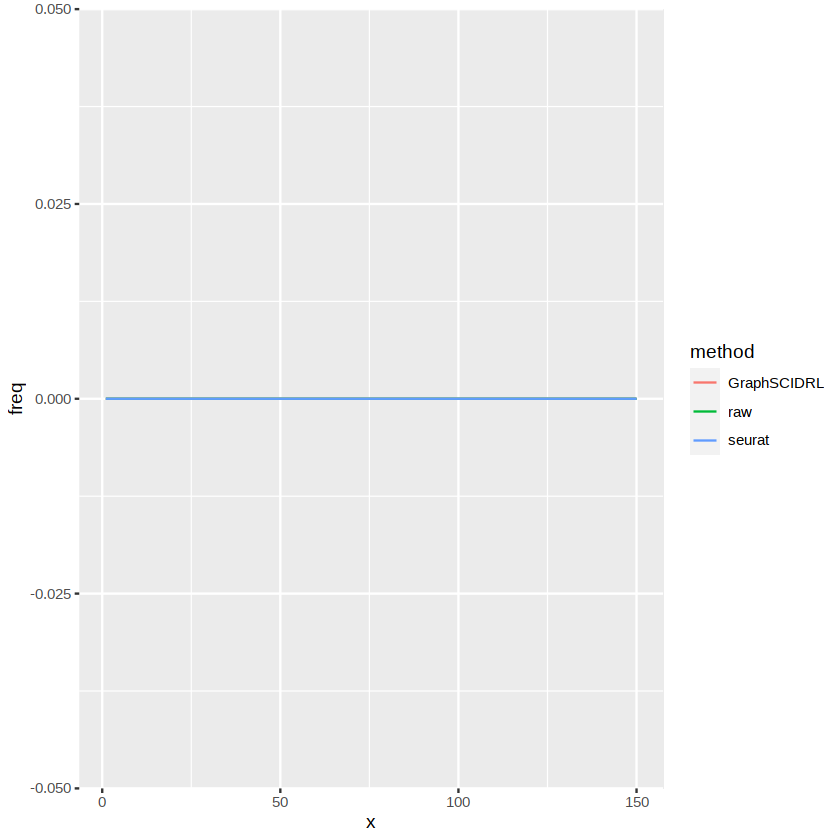

In [216]:
gene_overlap<-rbind(rbind(gene_overlap_seurat,gene_overlap_org),gene_overlap_re)
ggplot(gene_overlap,aes(x,freq,color=method))+geom_line()

基因在空间的表达

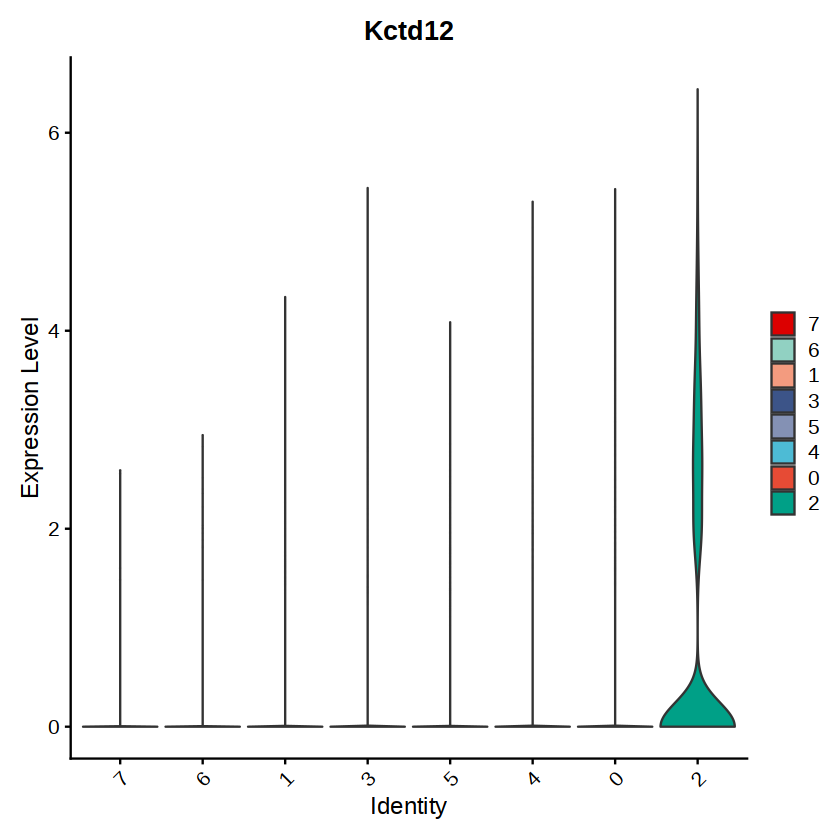

In [47]:
genes=c('Atp2b4','Mbp','Pcp4','Nrgn','Gabra1','Slc6a11','Kctd12')
genes=genes[7]
xx=data.frame(exp=dl_org@assays$RNA@data[genes,],clust=dl_org$gtt_clusters)
yy=aggregate(xx$exp,list(xx$clust),'mean')
zz=order(yy[,2])
color_used=colors[as.numeric(as.character(yy[zz,1]))+1]
VlnPlot(dl_org,features=genes,group.by='gtt_clusters',sort='decreasing',pt.size=0,cols =color_used)

In [26]:
# genes=c('FABP7','HPCAL1','PVALB','PCP4','KRT17','MOBP')
genes=c('Atp2b4','Mbp','Pcp4','Nrgn','Gabra1','Slc6a11','Kctd12')
genes=genes[1]
xx=data.frame(exp=dl_org@assays$RNA@data[genes,],clust=dl_org$gtt_clusters)
yy=aggregate(xx$exp,list(xx$clust),'mean')
zz=order(yy[,2])

# idx=c()
# for(i in as.character(yy[zz,1])){
#     idx=c(idx,which(uc1==i))
# }
# color_used=colors[idx]
color_used=colors[as.numeric(as.character(yy[zz,1]))+1]

pdf(paste(dirs,'fig/allsample_org_vlnplot_clusters_',genes,'.pdf',sep=""),height=1.8,width=1.8,useDingbats=FALSE)
p<-VlnPlot(dl_org,features=genes,group.by='gtt_clusters',sort='decreasing',pt.size=0,cols =color_used)+
theme_bw()+
theme(axis.text.x=element_text(size=8, face="bold",colour = "black"),
      axis.text.y=element_text(size=8, face="bold",colour = "black"),
      axis.title.x=element_blank(),
#       axis.title.y=element_text(size=10, face="bold",colour = "black"),
      axis.title.y=element_blank(),
      plot.title=element_text(face="bold", size=6, colour = "black",hjust=0.5),
      legend.text=element_text(size=7, colour = "black"),
      legend.title=element_text(size=8, colour = "black"),
      panel.border = element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      axis.line=element_line(size=0.3, colour = "black"),
      axis.ticks=element_line(size=0.3, colour = "black"),
    legend.position='None')
print(p)
dev.off()

# pdf(paste(dirs,'fig/allsample_org_vlnplot_celltype_',genes,'.pdf',sep=""),height=1.8,width=1.8,useDingbats=FALSE)
# p<-VlnPlot(dl_org,features=genes,group.by='celltype',sort='decreasing',pt.size=0)+scale_fill_npg()+
# theme_bw()+
# theme(axis.text.x=element_text(size=8, face="bold",colour = "black"),
#       axis.text.y=element_text(size=8, face="bold",colour = "black"),
#       axis.title.x=element_blank(),
# #       axis.title.y=element_text(size=10, face="bold",colour = "black"),
#       axis.title.y=element_blank(),
#       plot.title=element_text(face="bold", size=6, colour = "black",hjust=0.5),
#       legend.text=element_text(size=7, colour = "black"),
#       legend.title=element_text(size=8, colour = "black"),
#       panel.border = element_blank(),
#       panel.grid.major=element_blank(),
#       panel.grid.minor=element_blank(),
#       axis.line=element_line(size=0.3, colour = "black"),
#       axis.ticks=element_line(size=0.3, colour = "black"),
#     legend.position='None')
# print(p)
# dev.off()

png 
  2

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


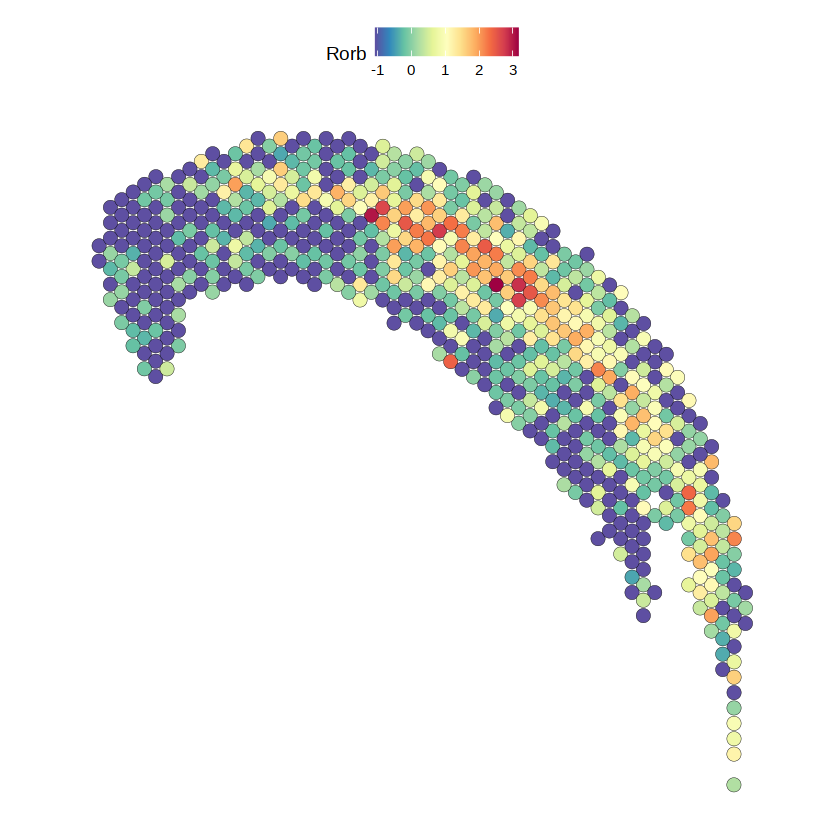

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


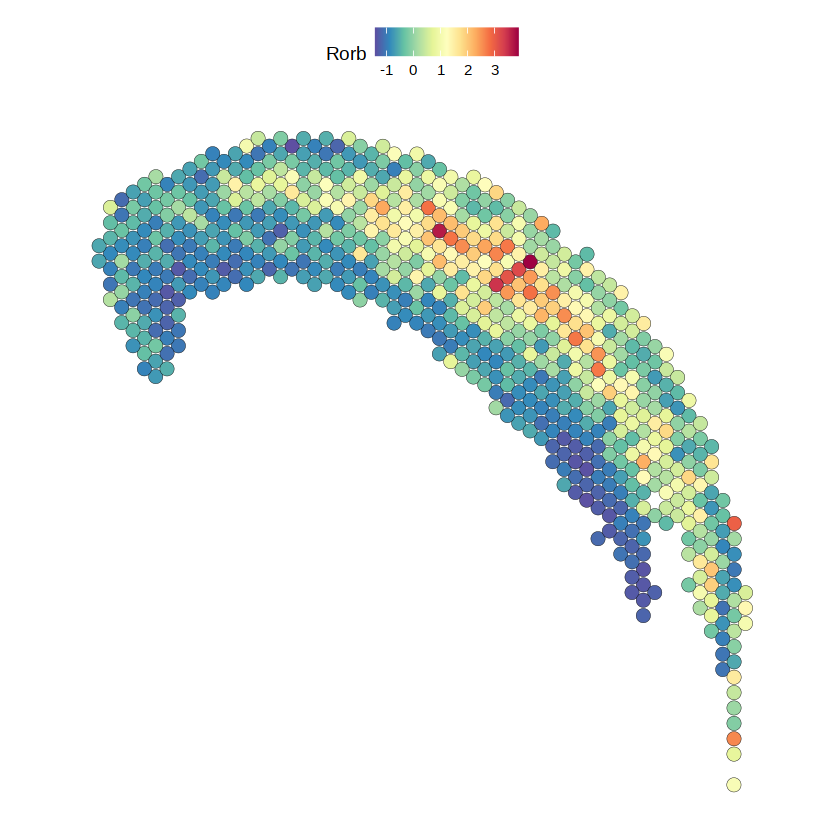

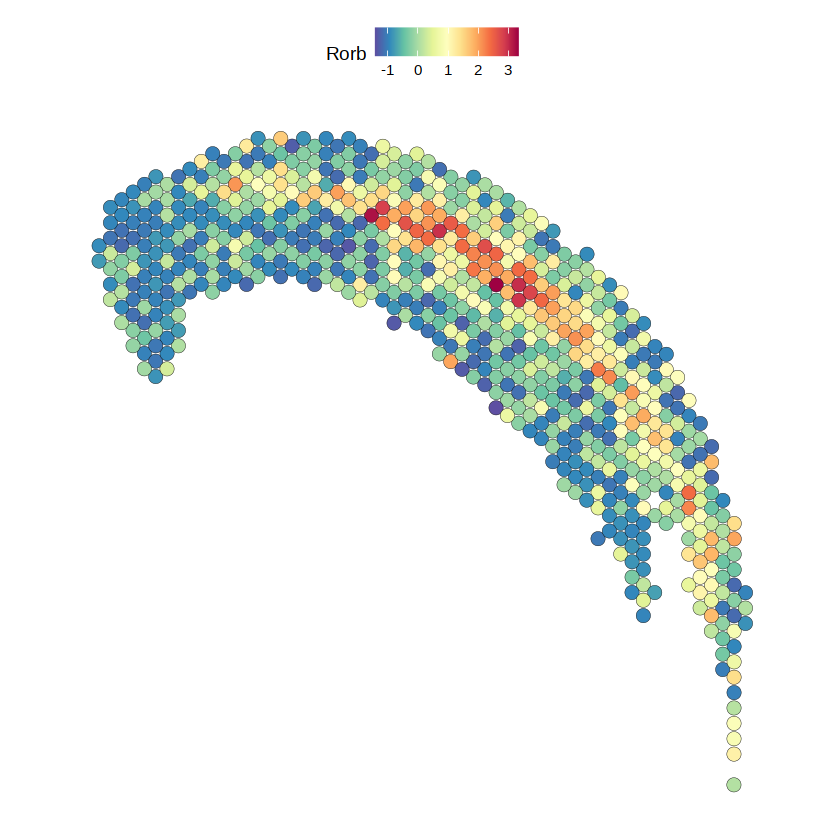

In [6]:
genes=c('Cux2','Rorb', 'Myl4','Fezf2','Rprm','Hs3st4')
k=2
i=3
size=5
dl_org1=subset(dl_org_cortex,subset=batch==ub[i])
dl_re1=subset(dl_re_cortex,subset=batch==ub[i])
dl_seurat1=subset(dl_seurat_cortex,subset=batch==ub[i])
a=t(apply(dl_org1@assays$RNA@data,1,scale))
colnames(a)<-colnames(dl_org1@assays$RNA@data)
dl_org1@assays$RNA@scale.data=a
a=t(apply(dl_re1@assays$RNA@data,1,scale))
colnames(a)<-colnames(dl_re1@assays$RNA@data)
dl_re1@assays$RNA@scale.data=a
a=t(apply(dl_seurat1@assays$RNA@data,1,scale))
colnames(a)<-colnames(dl_seurat1@assays$RNA@data)
dl_seurat1@assays$RNA@scale.data=a
SpatialFeaturePlot(dl_org1, slot='scale.data',features=genes[k], alpha=c(1,1),ncol=1,pt.size.factor=size)
SpatialFeaturePlot(dl_re1, slot='scale.data',features=genes[k], alpha=c(1,1),ncol=1,pt.size.factor=size)
SpatialFeaturePlot(dl_seurat1, slot='scale.data',features=genes[k], alpha=c(1,1),ncol=1,pt.size.factor=size)

In [25]:
# genes=c('FABP7','HPCAL1','ADCYAP1','RORB','TRABD2A','NTNG2','MOBP')
# ub[13]='referece coordinate'
 genes=c('Cux2','Rorb', 'Myl4','Fezf2','Rprm','Hs3st4')####posterior没有L5和L4，anterior2没有L4和L6b
# genes=c('Itpka','Amigo2','Hs3st4','Lrrtm4','Hpca')
# genes=c('Atp2b4','Mbp','Pcp4','Nrgn','Gabra1','Slc6a11','Kctd12')
ub[4]='referece coordinate'
i=1
k=6
# dl_org1=dl_org_hippo
# dl_seurat1=dl_seurat_hippo
# dl_re1=dl_re_hippo
# dl_org1=subset(dl_org_cortex,subset=batch==ub[i])
# dl_re1=subset(dl_re_cortex,subset=batch==ub[i])
# dl_seurat1=subset(dl_seurat_cortex,subset=batch==ub[i])
# a=t(apply(dl_org1@assays$RNA@data,1,scale))
# colnames(a)<-colnames(dl_org1@assays$RNA@data)
# dl_org1@assays$RNA@scale.data=a
# a=t(apply(dl_re1@assays$RNA@data,1,scale))
# colnames(a)<-colnames(dl_re1@assays$RNA@data)
# dl_re1@assays$RNA@scale.data=a
# a=t(apply(dl_seurat1@assays$RNA@data,1,scale))
# colnames(a)<-colnames(dl_seurat1@assays$RNA@data)
# dl_seurat1@assays$RNA@scale.data=a
size=5
size=3
size=8
png(paste(dirs,'fig/',ub[i],'_org_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
# png(paste(dirs,'fig/new_coord_org_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
p<-SpatialFeaturePlot(dl_org1, slot='scale.data',features=genes[k], alpha=c(1,1),ncol=1,pt.size.factor=size)+
labs(title=ub[i])+
theme(plot.title=element_text(face="bold", size=6, colour = "black",hjust=0.5),
    legend.position='right',
     legend.key.size = unit(0.5, 'cm'),
    legend.key.height = unit(0.2, 'cm'),
    legend.key.width = unit(0.2, 'cm'), 
     legend.text=element_text(size=3, colour = "black",face='bold'),
     legend.title=element_text(size=4, colour = "black",face='bold'))
print(p)
dev.off()

png(paste(dirs,'fig/',ub[i],'_re_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
# png(paste(dirs,'fig/new_coord_re_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
p<-SpatialFeaturePlot(dl_re1, features=genes[k], slot='scale.data',alpha=c(1,1),ncol=1,pt.size.factor=size)+
theme(legend.position='right',
     legend.key.size = unit(0.5, 'cm'),
    legend.key.height = unit(0.2, 'cm'),
    legend.key.width = unit(0.2, 'cm'), 
     legend.text=element_text(size=3, colour = "black",face='bold'),
     legend.title=element_text(size=4, colour = "black",face='bold'))
print(p)
dev.off()

png(paste(dirs,'fig/',ub[i],'_seurat_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
# png(paste(dirs,'fig/new_coord_seurat_spaplot_',genes[k],'.png',sep=""),width=800,height=800,res=500)
p<-SpatialFeaturePlot(dl_seurat1, slot='scale.data',features=genes[k], alpha=c(1,1),ncol=1,pt.size.factor=size)+
theme(legend.position='right',
     legend.key.size = unit(0.5, 'cm'),
    legend.key.height = unit(0.2, 'cm'),
    legend.key.width = unit(0.2, 'cm'), 
     legend.text=element_text(size=3, colour = "black",face='bold'),
     legend.title=element_text(size=4, colour = "black",face='bold'))
print(p)
dev.off()



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


png 
  2

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


png 
  2

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


png 
  2

marker的富集性

In [23]:
wt<-function(X,celltype,gene){
    X1=data.frame(exp=X[gene,],celltype=celltype)
    a=aggregate(X1$exp,list(X1[,2]),'median')
    a=a[order(-a$x),][1:2,1]
    cells1=colnames(X)[celltype==a[1]]
    cells2=colnames(X)[celltype==a[2]]
    Y1=X1[cells1,1]
    Y2=X1[cells2,1]
    a=wilcox.test(Y1, Y2,alternative = "greater")
    return(a$p.value)
}

In [30]:
genes=c('Cux2','Rorb', 'Myl4','Fezf2','Rprm','Hs3st4')
cortex=c('L2/3','L4','L5','L5/6','L6b')
marker=read_excel(paste(dirs,"marker/marker_genes_0703.xlsx",sep=""),sheet="saggital")
marker=as.data.frame(marker)
marker=intersect(rownames(dl_org@assays$RNA@data),marker[,1])
exp_org=as.matrix(dl_org@assays$RNA@data)
exp_re=as.matrix(dl_re@assays$RNA@data)
exp_seurat=as.matrix(dl_seurat@assays$RNA@data)
pv_org=c()
pv_re=c()
pv_seurat=c()
for(k  in 1:length(marker)){
    pv_org<-c(pv_org,wt(exp_org,as.data.frame(dl_org$celltype),marker[k]))
    pv_re<-c(pv_re,wt(exp_re,as.data.frame(dl_re$celltype),marker[k]))
    pv_seurat<-c(pv_seurat,wt(exp_seurat,as.data.frame(dl_seurat$celltype),marker[k]))
}
data<-rbind(data.frame(pvalue=pv_org,method='Raw'),
     data.frame(pvalue=pv_re,method='GraphSCIDRL'),
     data.frame(pvalue=pv_seurat,method='seurat'))
data<-aggregate(data$pvalue,list(data$method),'mean')
colnames(data)<-c('method','pvalue')
data$method[data$method=='GraphSCIDRL']='SPITAL'
data$pvalue=-10*log(data$pvalue)
write.csv(data,paste(dirs,"marker/marker_pvalue.csv",sep=""))

In [7]:
# ggplot(data,aes(x=reorder(method,pvalue),y=pvalue,fill=method))+geom_boxplot(outlier.shape=NA)+
# scale_y_continuous(limits = quantile(data$pvalue, c(0.0, 0.5)))
data=read.csv(paste(dirs,"marker/marker_pvalue.csv",sep=""),header=T,row.names=1)
data$method[data$method=='SPITAL']='SPIRAL'
png(paste(dirs,'fig/marker_pvalue.png',sep=""),width=1200,height=800,res=500)
p<-ggplot(data,aes(x=method,y=pvalue,fill=method))+geom_bar(stat='identity',lwd=0.1,position=position_dodge())+scale_fill_npg()+
labs(title='Marker Enrichment')+xlab('')+ylab('-10log(pvalue)')+theme_bw()+
theme(axis.text.x=element_text(size=4, face="bold",colour = "black"),
      axis.text.y=element_text(size=4, face="bold",colour = "black"),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      plot.title=element_text(face="bold", size=5, colour = "black",hjust=0.5),
      legend.text=element_text(size=4, colour = "black",face="bold"),
      legend.title=element_text(size=4, colour = "black",face="bold"),
      panel.border = element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      axis.line=element_line(size=0.3, colour = "black"),
      axis.ticks=element_line(size=0.3, colour = "black"),
     legend.position="right",
      legend.spacing.y = unit(0.05, 'cm'),
     legend.key.size = unit(0.1, 'cm'), 
     legend.key.height = unit(0.1, 'cm'),
     legend.key.width = unit(0.1, 'cm'),
      legend.box.margin=margin(-8,-8,-8,-8),
      strip.text = element_text(size = 5,face="bold",colour = "black"),
      strip.background=element_blank())
print(p)
dev.off()

png 
  2

png 
  2